In [1]:
import pandas as pd
import numpy as np
import matplotlib as mb

In [2]:
Adidas_df =  pd.read_csv("Adidas US Sales Datasets.csv")

In [3]:
Adidas_df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [4]:
Adidas_df['TotalSales'] = Adidas_df['Total Sales'].str.replace(r'[$,]', '', regex=True).astype(float)
total_sales = Adidas_df['TotalSales'].sum()
"Total Sales Revenue:", total_sales

('Total Sales Revenue:', np.float64(899902125.0))

In [5]:
region_profit = (Adidas_df.groupby('Region')['TotalSales'].sum().sort_values(ascending=False))

In [6]:
highest_region = region_profit.idxmax()
highest_value = region_profit.max()
highest_region

'West'

In [7]:
lowest_region = region_profit.idxmin()
lowest_value = region_profit.min()
lowest_region

'Midwest'

In [8]:
Market_Sales = Adidas_df.groupby('Region')['TotalSales'].sum()
market_sales = (Market_Sales / Market_Sales.sum()) * 100
market_sales


Region
Midwest      15.090581
Northeast    20.704926
South        16.075435
Southeast    18.132109
West         29.996949
Name: TotalSales, dtype: float64

In [9]:
Adidas_df['Invoice Date'] = pd.to_datetime(Adidas_df['Invoice Date'], dayfirst=True)

Adidas_df['Month'] = Adidas_df['Invoice Date'].dt.strftime('%B')

monthly = Adidas_df.groupby('Month')[['TotalSales']].sum()

monthly = monthly.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

print(monthly)

           TotalSales
Month                
January    71479142.0
February   61100153.0
March      56809109.0
April      72339970.0
May        80507695.0
June       74747372.0
July       95480694.0
August     92166201.0
September  77661459.0
October    63911033.0
November   67857340.0
December   85841957.0


In [10]:
Adidas_df['PriceperUnit'] = Adidas_df['Price per Unit'].str.replace(r'[$,]','',regex = True).astype(float)
Adidas_df['UnitsSold'] = Adidas_df['Units Sold'].str.replace(r',','',regex = True).astype(float)

In [11]:
Adidas_df['Discount_Amount'] = (Adidas_df['PriceperUnit']*Adidas_df['UnitsSold'] - Adidas_df['TotalSales'])
Adidas_df['Invoice Date'] = pd.to_datetime(Adidas_df['Invoice Date'], dayfirst=True)
Adidas_df['Month'] = Adidas_df['Invoice Date'].dt.strftime("%B")

In [12]:
monthly_discount = Adidas_df.groupby('Month')['Discount_Amount'].sum()
print(monthly_discount)

Month
April       -62648550.0
August      -79872975.0
December    -74426625.0
February    -52836300.0
January     -61734375.0
July        -82930275.0
June        -64944225.0
March       -49114125.0
May         -69765975.0
November    -58833900.0
October     -55372275.0
September   -67255875.0
Name: Discount_Amount, dtype: float64


In [13]:
Adidas_df['OperatingProfit'] = Adidas_df['Operating Profit'].str.replace(r'[$,]', '', regex=True).astype(float)
prod_profit = (Adidas_df.groupby('Product')['OperatingProfit'].sum().sort_values(ascending=False))
prod_profit.head(5)

Product
Men's Street Footwear      82802323.0
Women's Apparel            68650996.0
Men's Athletic Footwear    51846964.0
Women's Street Footwear    45095897.0
Men's Apparel              44763099.0
Name: OperatingProfit, dtype: float64

In [14]:
prod_profit.tail(5)

Product
Women's Apparel              68650996.0
Men's Athletic Footwear      51846964.0
Women's Street Footwear      45095897.0
Men's Apparel                44763099.0
Women's Athletic Footwear    38975843.0
Name: OperatingProfit, dtype: float64

In [15]:
prod_vol = Adidas_df.groupby('Product')['UnitsSold'].sum().sort_values(ascending=False)
prod_vol.head(1)


Product
Men's Street Footwear    593320.0
Name: UnitsSold, dtype: float64

In [16]:
msf = Adidas_df[Adidas_df['Product'] == "Men's Street Footwear"]
region_vol = msf.groupby('Region')['UnitsSold'].sum().sort_values(ascending=False)
region_vol

Region
West         150795.0
Northeast    134252.0
Midwest      109861.0
South        106545.0
Southeast     91867.0
Name: UnitsSold, dtype: float64

In [17]:
AVG_OR_VAL = Adidas_df.groupby('Product')['TotalSales'].mean().sort_values(ascending=False)
AVG_OR_VAL

Product
Men's Street Footwear        129705.741615
Women's Apparel              111342.574627
Men's Athletic Footwear       95449.490683
Women's Street Footwear       79603.739428
Men's Apparel                 77041.489415
Women's Athletic Footwear     66395.950187
Name: TotalSales, dtype: float64

In [18]:
customer_sales = Adidas_df.groupby('Retailer')['TotalSales'].sum().sort_values(ascending=False)

order_freq = Adidas_df['Retailer'].value_counts()

top_customer = customer_sales.index[0]
top_sales = customer_sales.iloc[0]
top_freq = order_freq[top_customer]

print("Top Customer (Retailer):", top_customer)
print("Total Sales:", top_sales)
print("Order Frequency:", top_freq)

Top Customer (Retailer): West Gear
Total Sales: 242964333.0
Order Frequency: 2374


In [19]:
city_sales = Adidas_df.groupby('City')[['TotalSales', 'OperatingProfit']].sum().sort_values('TotalSales', ascending=False)

top_city = city_sales.head(1)

print(top_city)

profit_margin = (top_city['OperatingProfit'] / top_city['TotalSales']) * 100
print("Profit Margin (%):")
print(profit_margin)

            TotalSales  OperatingProfit
City                                   
Charleston  39974797.0       15607205.0
Profit Margin (%):
City
Charleston    39.042612
dtype: float64


In [20]:
region_summary = Adidas_df.groupby('Region')[['TotalSales', 'OperatingProfit']].sum().sort_values('TotalSales', ascending=False)

print(region_summary)

            TotalSales  OperatingProfit
Region                                 
West       269943182.0       89609516.0
Northeast  186324067.0       68020688.0
Southeast  163171236.0       60555462.0
South      144663181.0       61138044.0
Midwest    135800459.0       52811412.0


In [21]:
Adidas_df['ListValue'] = Adidas_df['PriceperUnit'] * Adidas_df['UnitsSold']
Adidas_df['Discount_Amount'] = Adidas_df['ListValue'] - Adidas_df['TotalSales']

In [22]:
overall_discount_pct = Adidas_df['Discount_Amount'].sum() / Adidas_df['ListValue'].sum() * 100
overall_profit_margin = Adidas_df['OperatingProfit'].sum() / Adidas_df['TotalSales'].sum() * 100
print(overall_discount_pct, overall_profit_margin)

-648.8784325767591 36.90791618032905


In [23]:
Adidas_df['Profit'] = Adidas_df['Operating Profit'].str.replace(r'[$,]','',regex=True).astype(float)

neg_orders = Adidas_df[Adidas_df['Profit'] < 0]

neg_count = len(neg_orders)

by_product = neg_orders['Product'].value_counts()
by_region = neg_orders['Region'].value_counts()
by_retailer = neg_orders['Retailer'].value_counts()

print(neg_count)
print(by_product)
print(by_region)
print(by_retailer)

0
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [24]:
ratio = Adidas_df.groupby('Product')[['TotalSales','OperatingProfit']].sum()
ratio['Profit_to_Sales_Ratio'] = ratio['OperatingProfit'] / ratio['TotalSales'] * 100
print(ratio)

                            TotalSales  OperatingProfit  Profit_to_Sales_Ratio
Product                                                                       
Men's Apparel              123728632.0       44763099.0              36.178448
Men's Athletic Footwear    153673680.0       51846964.0              33.738350
Men's Street Footwear      208826244.0       82802323.0              39.651301
Women's Apparel            179038860.0       68650996.0              38.344187
Women's Athletic Footwear  106631896.0       38975843.0              36.551768
Women's Street Footwear    128002813.0       45095897.0              35.230395


In [25]:
avg_order = Adidas_df.groupby('Region')['TotalSales'].mean().sort_values(ascending=False)
print(avg_order)

Region
Southeast    133309.833333
West         110270.907680
South         83717.118634
Northeast     78419.220118
Midwest       72542.980235
Name: TotalSales, dtype: float64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

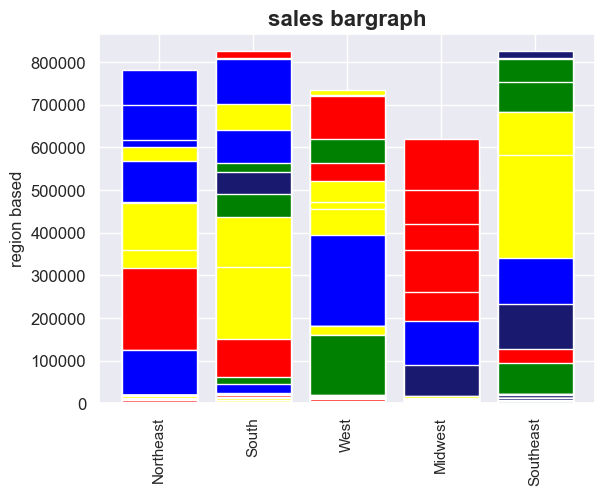

In [62]:
plt.bar(x = Adidas_df['Region'], height=Adidas_df['TotalSales'],
        color=["red", "green", "blue","Yellow","midnightblue"])
plt.xticks(rotation = 90)
plt.yticks(fontsize = 12)
plt.title("sales bargraph", fontsize = 16, fontweight = "bold")
plt.ylabel("region based")
plt.show()

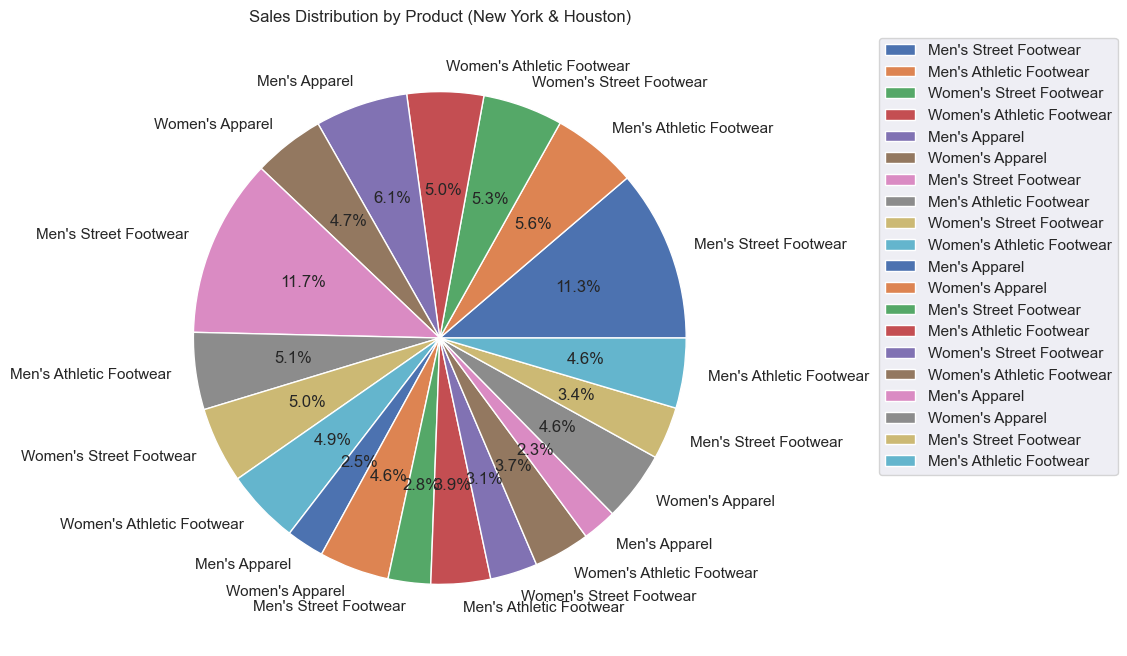

In [108]:

Ny_subset = Adidas_df[Adidas_df['City'] == 'New York'].head(10)
Hou_subset = Adidas_df[Adidas_df['City'] == 'Houston'].head(10)
subset = pd.concat([Ny_subset, Hou_subset])

plt.figure(figsize=(10, 8))
plt.pie(subset['OperatingProfit'], labels=subset['Product'], autopct='%1.1f%%')
plt.title("Sales Distribution by Product (New York & Houston)")
plt.legend(subset['Product'], bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

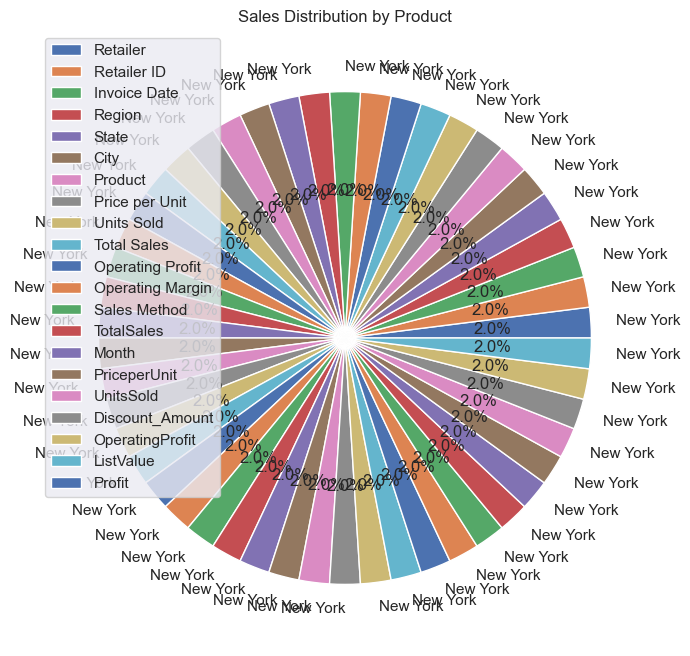

In [112]:
plt.figure(figsize=(10, 8))
plt.pie(Adidas_df['Retailer ID'].head(50), labels=Adidas_df['City'].head(50), autopct='%1.1f%%')
plt.title("Sales Distribution by Product")
plt.legend(Adidas_df)
plt.show()

In [117]:
Total_revenue_by_product_category = Adidas_df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False)
Total_revenue_by_product_category


Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: TotalSales, dtype: float64

In [116]:
Revenue_by_sales_method = Adidas_df.groupby('Sales Method')['TotalSales'].sum().sort_values(ascending=False)
Revenue_by_sales_method


Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: TotalSales, dtype: float64

In [119]:
AOM_Product = (Adidas_df.groupby('Product')[['TotalSales', 'OperatingProfit']]
        .sum().assign(Margin=lambda x: x['OperatingProfit']/x['TotalSales']*100))
AOM_Product

,TotalSales,OperatingProfit,Margin
Product,,,
Men's Apparel,123728632.0,44763099.0,36.178448
Men's Athletic Footwear,153673680.0,51846964.0,33.738350
Men's Street Footwear,208826244.0,82802323.0,39.651301
Women's Apparel,179038860.0,68650996.0,38.344187
Women's Athletic Footwear,106631896.0,38975843.0,36.551768
Women's Street Footwear,128002813.0,45095897.0,35.230395


In [120]:
Adidas_df['Date'] = pd.to_datetime(Adidas_df['Invoice Date'])
Revenue_trend_month = Adidas_df.groupby(Adidas_df['Date'].dt.to_period('M'))['TotalSales'].sum()
Revenue_trend_month

Date
2020-01    16253746.0
2020-02    14997988.0
2020-03    17660577.0
2020-04    24607006.0
2020-05    16918014.0
2020-06     8829819.0
2020-07    17146013.0
2020-08    19877980.0
2020-09    18304436.0
2020-10    10836269.0
2020-11     8622300.0
2020-12     8026527.0
2021-01    55225396.0
2021-02    46102165.0
2021-03    39148532.0
2021-04    47732964.0
2021-05    63589681.0
2021-06    65917553.0
2021-07    78334681.0
2021-08    72288221.0
2021-09    59357023.0
2021-10    53074764.0
2021-11    59235040.0
2021-12    77815430.0
Freq: M, Name: TotalSales, dtype: float64

In [121]:
Sales_profit_region = Adidas_df.groupby('Region')[['TotalSales', 'OperatingProfit']].sum()
Sales_profit_region['Margin'] = Sales_profit_region['OperatingProfit'] / Sales_profit_region['TotalSales'] * 100
Sales_profit_region


,TotalSales,OperatingProfit,Margin
Region,,,
Midwest,135800459.0,52811412.0,38.888979
Northeast,186324067.0,68020688.0,36.506657
South,144663181.0,61138044.0,42.262339
Southeast,163171236.0,60555462.0,37.111603
West,269943182.0,89609516.0,33.195695


In [122]:
daily = Adidas_df.groupby('Date')['Total Sales'].sum()

spike = daily.max()
drop = daily.min()
spike, drop


('$97,500 $2,700 $2,064 ', '$1,00,000 $1,30,000 $2,850 $3,384 ')

In [123]:
Operating_profity_product = Adidas_df.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False)
Operating_profity_product

Product
Men's Street Footwear        $3,00,000 $3,12,500 $3,05,000 $3,00,000 $3,66,...
Men's Apparel                $1,62,000 $1,62,000 $1,53,000 $1,48,500 $1,57,...
Men's Athletic Footwear      $1,50,000 $1,35,000 $1,38,750 $1,35,000 $1,52,...
Women's Street Footwear      $1,40,000 $1,33,000 $1,33,000 $1,26,000 $1,57,...
Women's Athletic Footwear    $1,33,875 $1,29,938 $1,26,000 $1,29,938 $1,48,...
Women's Apparel              $1,25,000 $1,25,000 $1,18,750 $1,18,750 $1,62,...
Name: Operating Profit, dtype: object

In [124]:
PM_SalesMethod= (Adidas_df.groupby('Sales Method')[['TotalSales','OperatingProfit']]
        .sum()
        .assign(Margin=lambda x: x['OperatingProfit']/x['TotalSales']*100))
PM_SalesMethod


,TotalSales,OperatingProfit,Margin
Sales Method,,,
In-store,356643750.0,127591382.0,35.775583
Online,247672882.0,96555337.0,38.985026
Outlet,295585493.0,107988403.0,36.533729


In [125]:
Adidas_df['Margin'] = Adidas_df['OperatingProfit'] / Adidas_df['TotalSales'] * 100
LM_product = Adidas_df.sort_values('Margin').head(10)
LM_product

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,TotalSales,Month,PriceperUnit,UnitsSold,Discount_Amount,OperatingProfit,ListValue,Profit,Date,Margin
193,West Gear,1128299,2021-01-29,West,California,San Francisco,Women's Apparel,$70.00,775,"$5,42,500",...,542500.0,January,70.0,775.0,-488250.0,54250.0,54250.0,54250.0,2021-01-29,10.000000
211,West Gear,1128299,2021-02-16,West,California,San Francisco,Women's Apparel,$70.00,800,"$5,60,000",...,560000.0,February,70.0,800.0,-504000.0,56000.0,56000.0,56000.0,2021-02-16,10.000000
205,West Gear,1128299,2021-02-10,West,California,San Francisco,Women's Apparel,$70.00,775,"$5,42,500",...,542500.0,February,70.0,775.0,-488250.0,54250.0,54250.0,54250.0,2021-02-10,10.000000
199,West Gear,1128299,2021-02-04,West,California,San Francisco,Women's Apparel,$70.00,700,"$4,90,000",...,490000.0,February,70.0,700.0,-441000.0,49000.0,49000.0,49000.0,2021-02-04,10.000000
7975,West Gear,1128299,2021-02-04,West,California,San Francisco,Women's Apparel,$46.00,224,"$10,304",...,10304.0,February,46.0,224.0,0.0,1236.0,10304.0,1236.0,2021-02-04,11.995342
7981,West Gear,1128299,2021-02-10,West,California,San Francisco,Women's Apparel,$56.00,256,"$14,336",...,14336.0,February,56.0,256.0,0.0,2150.0,14336.0,2150.0,2021-02-10,14.997210
583,West Gear,1128299,2020-03-26,West,Colorado,Denver,Women's Apparel,$40.00,400,"$1,60,000",...,160000.0,March,40.0,400.0,-144000.0,24000.0,16000.0,24000.0,2020-03-26,15.000000
595,West Gear,1128299,2020-04-07,West,Colorado,Denver,Women's Apparel,$80.00,325,"$2,60,000",...,260000.0,April,80.0,325.0,-234000.0,39000.0,26000.0,39000.0,2020-04-07,15.000000
1297,Foot Locker,1128299,2021-02-10,West,Hawaii,Honolulu,Men's Apparel,$50.00,150,"$75,000",...,75000.0,February,50.0,150.0,-67500.0,11250.0,7500.0,11250.0,2021-02-10,15.000000
1315,Foot Locker,1128299,2021-05-11,West,Hawaii,Honolulu,Men's Apparel,$60.00,175,"$1,05,000",...,105000.0,May,60.0,175.0,-94500.0,15750.0,10500.0,15750.0,2021-05-11,15.000000


In [ ]:
MensFootware_revenue = Adidas_df[Adidas_df['Product'].str.contains("Men's")].groupby('Product')['TotalSales'].sum()
MensFootware_revenue

Product
Men's Apparel              123728632.0
Men's Athletic Footwear    153673680.0
Men's Street Footwear      208826244.0
Name: TotalSales, dtype: float64

In [ ]:
women = Adidas_df[Adidas_df['Product'].str.contains("Women's")]
W_athletic_vs_Street = women.groupby('Product')[['TotalSales', 'OperatingProfit', 'UnitsSold']].sum()
W_athletic_vs_Street

,TotalSales,OperatingProfit,UnitsSold
Product,,,
Women's Apparel,179038860.0,68650996.0,433827.0
Women's Athletic Footwear,106631896.0,38975843.0,317236.0
Women's Street Footwear,128002813.0,45095897.0,392269.0


In [130]:
unique_days = Adidas_df['Date'].nunique()

Avg_unique_days = Adidas_df.groupby('Product')['UnitsSold'].sum() / unique_days
Avg_unique_days


Product
Men's Apparel                423.595304
Men's Athletic Footwear      601.555249
Men's Street Footwear        819.502762
Women's Apparel              599.208564
Women's Athletic Footwear    438.171271
Women's Street Footwear      541.808011
Name: UnitsSold, dtype: float64